In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time
from matplotlib.dates import date2num
import numpy.polynomial.polynomial as poly
from scipy.interpolate import Akima1DInterpolator


In [192]:
df = pd.read_csv("Unemployment_Participation_Per_1000_Persons_typewise_upto2012.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,Particulars,1978.0,1983.0,1988.0,1994,2000,2005,2010,2012
1,Usual Status - Rural - Total,NaN,NaN,NaN,18,19,25,21,23
2,Usual Status - Rural - Male,22.0,21.0,28.0,20,21,21,19,21
3,Usual Status - Rural - Female,55.0,14.0,35.0,13,15,31,24,29
4,Usual Status - Urban - Total,NaN,NaN,NaN,52,52,53,37,38


In [193]:
transposed_df = df.transpose()
transposed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Particulars,Usual Status - Rural - Total,Usual Status - Rural - Male,Usual Status - Rural - Female,Usual Status - Urban - Total,Usual Status - Urban - Male,Usual Status - Urban - Female,Usual Status - Adjusted - Rural - Total,Usual Status - Adjusted - Rural - Male,Usual Status - Adjusted - Rural - Female,...,Current Weekly Status - Rural - Female,Current Weekly Status - Urban - Total,Current Weekly Status - Urban - Male,Current Weekly Status - Urban - Female,Current Daily Status - Rural - Total,Current Daily Status - Rural - Male,Current Daily Status - Rural - Female,Current Daily Status - Urban - Total,Current Daily Status - Urban - Male,Current Daily Status - Urban - Female
1,1978,NaN,22,55,NaN,65,178,NaN,13,20,...,41,NaN,71,109,NaN,71,92,NaN,94,145
2,1983,NaN,21,14,NaN,59,69,NaN,14,7,...,43,NaN,67,75,NaN,75,90,NaN,92,110
3,1988,NaN,28,35,NaN,61,85,NaN,18,24,...,44,NaN,66,92,NaN,46,67,NaN,88,120
4,1994,18,20,13,52,45,83,11,14,9,...,29,56,52,79,56,56,56,76,67,104


In [194]:
transposed_df.to_csv("Transposed_Unemployment_Participation_Per_1000_Persons_typewise_upto2012.csv", index=False, header=False, sep="\t")

In [195]:
new_df = pd.read_csv("Transposed_Unemployment_Participation_Per_1000_Persons_typewise_upto2012.csv",sep="\t")
new_df.set_index("Particulars")

,Usual Status - Rural - Total,Usual Status - Rural - Male,Usual Status - Rural - Female,Usual Status - Urban - Total,Usual Status - Urban - Male,Usual Status - Urban - Female,Usual Status - Adjusted - Rural - Total,Usual Status - Adjusted - Rural - Male,Usual Status - Adjusted - Rural - Female,Usual Status - Adjusted - Urban - Total,...,Current Weekly Status - Rural - Female,Current Weekly Status - Urban - Total,Current Weekly Status - Urban - Male,Current Weekly Status - Urban - Female,Current Daily Status - Rural - Total,Current Daily Status - Rural - Male,Current Daily Status - Rural - Female,Current Daily Status - Urban - Total,Current Daily Status - Urban - Male,Current Daily Status - Urban - Female
Particulars,,,,,,,,,,,,,,,,,,,,,
1978.0,NaN,22.0,55.0,NaN,65.0,178.0,NaN,13.0,20.0,NaN,...,41.0,NaN,71.0,109.0,NaN,71.0,92.0,NaN,94.0,145.0
1983.0,NaN,21.0,14.0,NaN,59.0,69.0,NaN,14.0,7.0,NaN,...,43.0,NaN,67.0,75.0,NaN,75.0,90.0,NaN,92.0,110.0
1988.0,NaN,28.0,35.0,NaN,61.0,85.0,NaN,18.0,24.0,NaN,...,44.0,NaN,66.0,92.0,NaN,46.0,67.0,NaN,88.0,120.0
1994.0,18.0,20.0,13.0,52.0,45.0,83.0,11.0,14.0,9.0,44.0,...,29.0,56.0,52.0,79.0,56.0,56.0,56.0,76.0,67.0,104.0
2000.0,19.0,21.0,15.0,52.0,48.0,71.0,15.0,17.0,10.0,47.0,...,37.0,59.0,56.0,73.0,71.0,72.0,70.0,77.0,73.0,94.0
2005.0,25.0,21.0,31.0,53.0,44.0,91.0,17.0,16.0,18.0,45.0,...,42.0,60.0,52.0,90.0,82.0,80.0,87.0,83.0,75.0,116.0
2010.0,21.0,19.0,24.0,37.0,30.0,70.0,16.0,16.0,16.0,34.0,...,37.0,42.0,36.0,72.0,68.0,64.0,80.0,58.0,51.0,91.0
2012.0,23.0,21.0,29.0,38.0,32.0,66.0,17.0,17.0,17.0,34.0,...,35.0,44.0,38.0,67.0,57.0,62.0,55.0,55.0,49.0,80.0


In [196]:
X = new_df["Particulars"]
y = new_df["Current Daily Status - Rural - Male"]

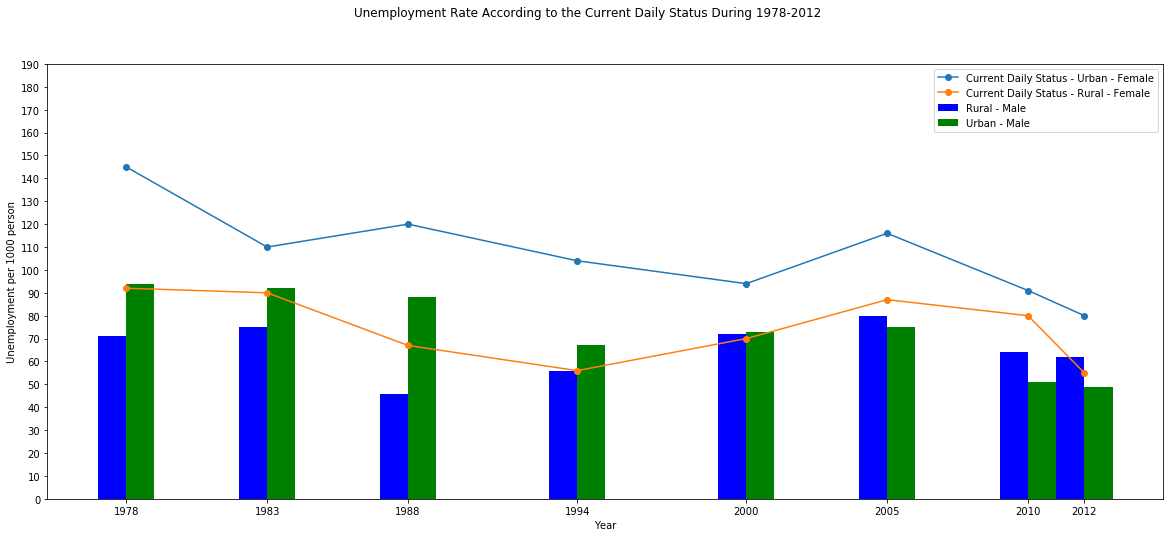

In [197]:
w=1
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle("Unemployment Rate According to the Current Daily Status During 1978-2012")

ax.plot(new_df["Particulars"],new_df["Current Daily Status - Urban - Female"],'o-')
ax.plot(new_df["Particulars"],new_df["Current Daily Status - Rural - Female"],'o-')


ax.bar(new_df["Particulars"]-w/2,new_df["Current Daily Status - Rural - Male"],width=w, color="blue",label="Rural - Male")
ax.bar(new_df["Particulars"]+w/2,new_df["Current Daily Status - Urban - Male"],width=w,color="green",label="Urban - Male")

ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Unemployment per 1000 person")

plt.xticks(new_df["Particulars"])
plt.yticks([x*10 for x in range(0,20)])
plt.show()



In [198]:
''' This is fitting of the curve on female data '''

x_given = new_df["Particulars"] #[0.,1.,2.,3.,4.,5.]
y_given = new_df["Current Daily Status - Rural - Female"] #[0.,0.8,0.9,0.1,-0.8,-1.0]

In [199]:
coef = poly.polyfit(x_given,y_given,3)
coef

array([  5.52193648e+07,  -8.29484382e+04,   4.15335020e+01,
        -6.93205272e-03])

In [203]:
x_new = np.linspace(x_given.min(), x_given.max(), num=20)
x_new

array([ 1978.        ,  1979.78947368,  1981.57894737,  1983.36842105,
        1985.15789474,  1986.94736842,  1988.73684211,  1990.52631579,
        1992.31578947,  1994.10526316,  1995.89473684,  1997.68421053,
        1999.47368421,  2001.26315789,  2003.05263158,  2004.84210526,
        2006.63157895,  2008.42105263,  2010.21052632,  2012.        ])

In [204]:
ffit=poly.polyval(x_new,coef)
ffit

array([ 99.15884609,  88.69179039,  80.53985339,  74.46469942,
        70.2279928 ,  67.59139788,  66.31657895,  66.16520039,
        66.89892644,  68.27942149,  70.06834985,  72.02737582,
        73.91816376,  75.50237796,  76.54168278,  76.79774253,
        76.03222152,  74.00678408,  70.48309454,  65.22281722])

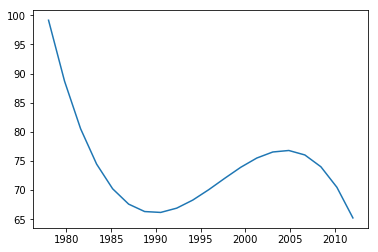

In [205]:
plt.plot(x_new, ffit)
plt.show()

In [206]:
## Plot whole graph again

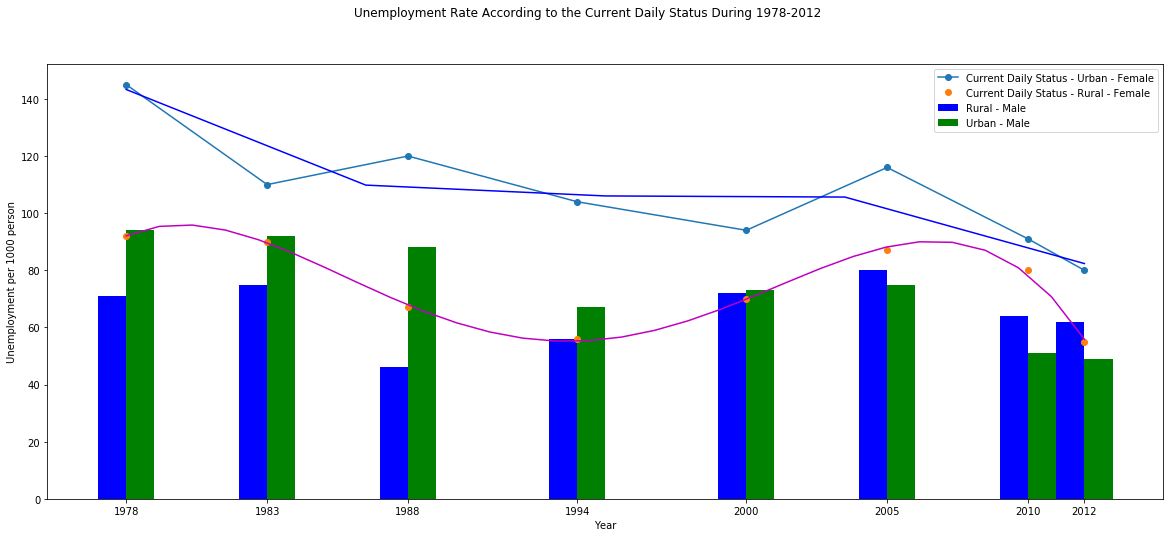

In [207]:
w=1
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle("Unemployment Rate According to the Current Daily Status During 1978-2012")

ax.plot(new_df["Particulars"],new_df["Current Daily Status - Urban - Female"],'o-')
ax.plot(new_df["Particulars"],new_df["Current Daily Status - Rural - Female"],'o')

'''get smooth curve fit on the data for Females (curve fitting) '''
x_given = new_df["Particulars"] 
y_given = new_df["Current Daily Status - Rural - Female"]
# get coefficent with 4 degree polynomial
coef = poly.polyfit(x_given,y_given,4)
# spread data
x_new = np.linspace(x_given.min(), x_given.max(), num=30)
# get ploynomial values
ffit=poly.polyval(x_new,coef)
plt.plot(x_new, ffit,color="m")

''' Try for best fit for Urban - Female Data'''
y_given = new_df["Current Daily Status - Urban - Female"]
# get coefficent with 4 degree polynomial
coef = poly.polyfit(x_given,y_given,3)
# spread data
x_new = np.linspace(x_given.min(), x_given.max(), num=5)
# get ploynomial values
ffit=poly.polyval(x_new,coef)
plt.plot(x_new, ffit,color="b")


ax.bar(new_df["Particulars"]-w/2,new_df["Current Daily Status - Rural - Male"],width=w, color="blue",label="Rural - Male")
ax.bar(new_df["Particulars"]+w/2,new_df["Current Daily Status - Urban - Male"],width=w,color="green",label="Urban - Male")

ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Unemployment per 1000 person")

plt.xticks(new_df["Particulars"])
# plt.yticks([x*10 for x in range(0,20)])
plt.show()

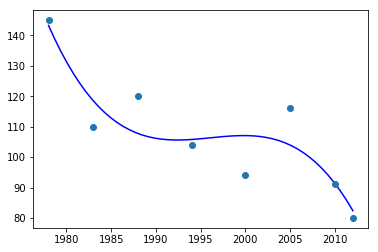

In [208]:

# the best fit on the Urban - Female
x_given = new_df["Particulars"] 
y_given = new_df["Current Daily Status - Urban - Female"]
# get coefficent with 4 degree polynomial
coef = poly.polyfit(x_given,y_given,3)
# spread data
x_new = np.linspace(x_given.min(), x_given.max(), num=50)
# get ploynomial values
ffit=poly.polyval(x_new,coef)
plt.plot(x_new, ffit,color="b")

plt.plot(new_df["Particulars"],new_df["Current Daily Status - Urban - Female"],'o')
plt.show()

In [209]:
# akima interpolation via Akima1DInterpolator for Urban - Female

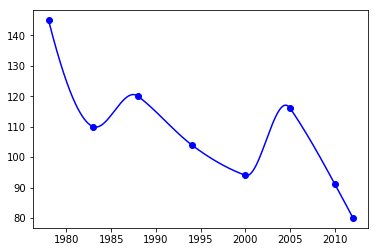

In [210]:
x_given = new_df["Particulars"] 
y_given = new_df["Current Daily Status - Urban - Female"]


akima_i = Akima1DInterpolator(x_given, y_given)
x_new = np.linspace(min(x_given), max(x_given), 1000)
plt.plot(x_given, y_given, 'bo')
plt.plot(x_new, akima_i(x_new), 'b', label='random points')
plt.show()

In [211]:
# Now plot all the lines in whole graph

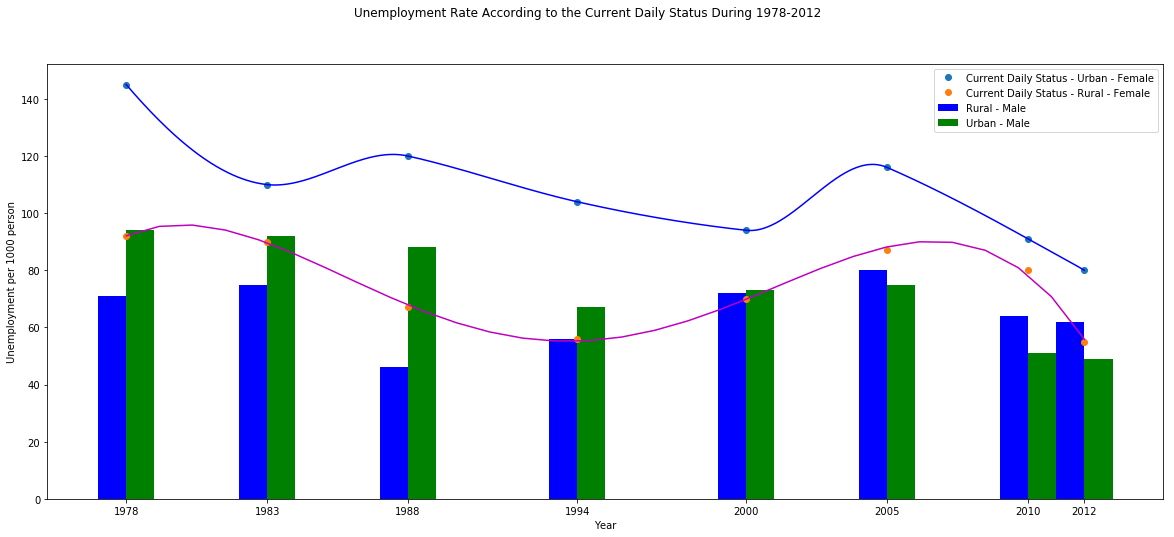

In [214]:
w=1
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle("Unemployment Rate According to the Current Daily Status During 1978-2012")

''' Plot Scatter for females '''
ax.plot(new_df["Particulars"],new_df["Current Daily Status - Urban - Female"],'o')
ax.plot(new_df["Particulars"],new_df["Current Daily Status - Rural - Female"],'o')

'''get smooth curve fit on the data for Females (curve fitting) '''
x_given = new_df["Particulars"] 
y_given = new_df["Current Daily Status - Rural - Female"]
# get coefficent with 4 degree polynomial
coef = poly.polyfit(x_given,y_given,4)
# spread data
x_new = np.linspace(x_given.min(), x_given.max(), num=30)
# get ploynomial values
ffit=poly.polyval(x_new,coef)
plt.plot(x_new, ffit,color="m")

''' Plot Urban - Female Data using Akima1DInterpolator to avoid oscillation Fit the curve in pieces/parts'''
y_given = new_df["Current Daily Status - Urban - Female"]
akima_i = Akima1DInterpolator(x_given, y_given)
x_new = np.linspace(min(x_given), max(x_given), 1000)
plt.plot(x_new, akima_i(x_new), 'b')

''' Plot Bar graph for Males '''
ax.bar(new_df["Particulars"]-w/2,new_df["Current Daily Status - Rural - Male"],width=w, color="blue",label="Rural - Male")
ax.bar(new_df["Particulars"]+w/2,new_df["Current Daily Status - Urban - Male"],width=w,color="green",label="Urban - Male")

ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Unemployment per 1000 person")

plt.xticks(new_df["Particulars"])
# plt.yticks([x*10 for x in range(0,20)])
plt.show()